# Analyse Exploratoire du fichier myreport_ping_full.csv

### Imports (fichier & modules)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [2]:
tab = pd.read_csv('../data/logServer/myreport_ping_full.csv',sep=',')

### Le fichier myreport_ping_full.csv : taille, colonnes

In [3]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  14  colonnes dans le data frame


In [4]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Temps du ping',
       'Temps du ping(RAW)', 'Minimum', 'Minimum(RAW)', 'Maximum',
       'Maximum(RAW)', 'Perte de paquets', 'Perte de paquets(RAW)',
       'Temps mort', 'Temps mort(RAW)', 'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [5]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date et heure          2882 non-null   object 
 1   Date et heure(RAW)     2881 non-null   float64
 2   Temps du ping          2195 non-null   object 
 3   Temps du ping(RAW)     2194 non-null   float64
 4   Minimum                2195 non-null   object 
 5   Minimum(RAW)           2194 non-null   float64
 6   Maximum                2195 non-null   object 
 7   Maximum(RAW)           2194 non-null   float64
 8   Perte de paquets       2186 non-null   object 
 9   Perte de paquets(RAW)  2194 non-null   float64
 10  Temps mort             2195 non-null   object 
 11  Temps mort(RAW)        2194 non-null   float64
 12  Couverture             2882 non-null   object 
 13  Couverture(RAW)        2881 non-null   float64
dtypes: float64(7), object(7)
memory usage: 315.3+ KB


On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [6]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure            2882
Date et heure(RAW)       2881
Temps du ping              10
Temps du ping(RAW)        418
Minimum                     3
Minimum(RAW)                5
Maximum                    36
Maximum(RAW)              400
Perte de paquets            2
Perte de paquets(RAW)       3
Temps mort                  1
Temps mort(RAW)             1
Couverture                  3
Couverture(RAW)             2
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [7]:
tab.head()


,Date et heure,Date et heure(RAW),Temps du ping,Temps du ping(RAW),Minimum,Minimum(RAW),Maximum,Maximum(RAW),Perte de paquets,Perte de paquets(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,1 ms,0.7333,0 ms,0.0,3 ms,2.7667,0 %,0.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,0 ms,0.0033,0 ms,0.0,0 ms,0.0167,0 %,0.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,0 ms,0.0000,0 ms,0.0,0 ms,0.0000,0 %,0.0,0 %,0.0,100 %,10000.0


In [8]:
tab["Date et heure"] = tab["Date et heure"].str.split(" - ").str[0]
tab = tab.iloc[:-5]
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

### Réagencement et Suppression des colonnes

In [9]:
# renommage des colonnes
tab.rename(columns={"Temps du ping(RAW)": "Temps du ping(ms)"}, inplace=True)
tab.rename(columns={"Minimum(RAW)": "Minimum ping (ms)"}, inplace=True)
tab.rename(columns={"Maximum(RAW)": "Maximum ping (ms)"}, inplace=True)
tab.rename(columns={"Perte de paquets(RAW)": "Perte de paquets (ping)(%)"}, inplace=True)
tab.rename(columns={"Temps mort(RAW)": "Temps mort ping (%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture ping(%)"}, inplace=True)

# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Temps du ping"])
tab = tab.drop(columns=["Minimum"])
tab = tab.drop(columns=["Maximum"])
tab = tab.drop(columns=["Perte de paquets"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])


In [10]:
tab.head()

,Date et heure,Temps du ping(ms),Minimum ping (ms),Maximum ping (ms),Perte de paquets (ping)(%),Temps mort ping (%),Couverture ping(%)
288,2024-08-25 00:00:00,0.4900,0.0,2.4500,0.0,0.0,10000.0
289,2024-08-25 01:00:00,0.0700,0.0,0.3500,0.0,0.0,10000.0
290,2024-08-25 02:00:00,0.5433,0.0,2.3667,0.0,0.0,10000.0
291,2024-08-25 03:00:00,0.0000,0.0,0.0000,0.0,0.0,10000.0
292,2024-08-25 04:00:00,0.0033,0.0,0.0167,0.0,0.0,10000.0


In [11]:
tab.shape

(1248, 7)

## Analyse temporelle

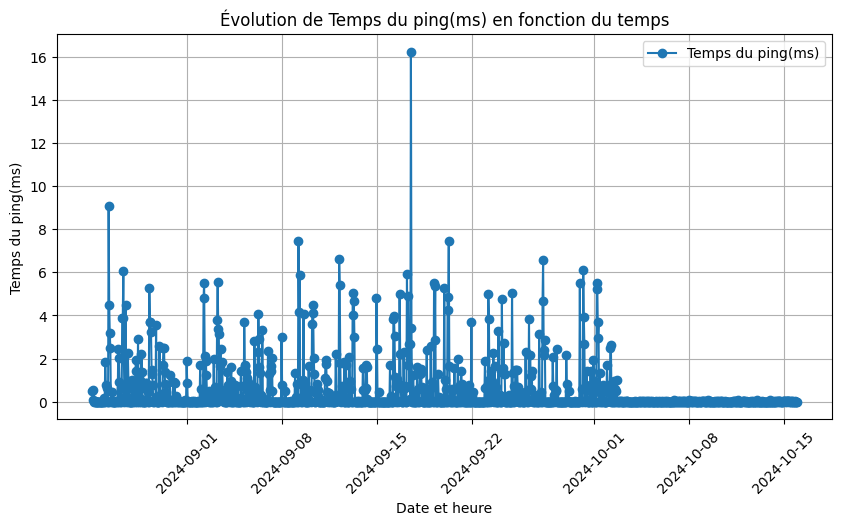

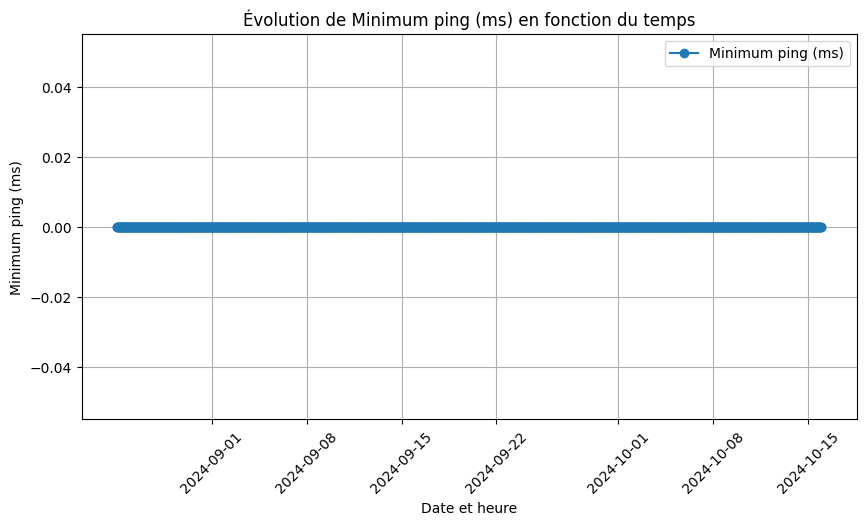

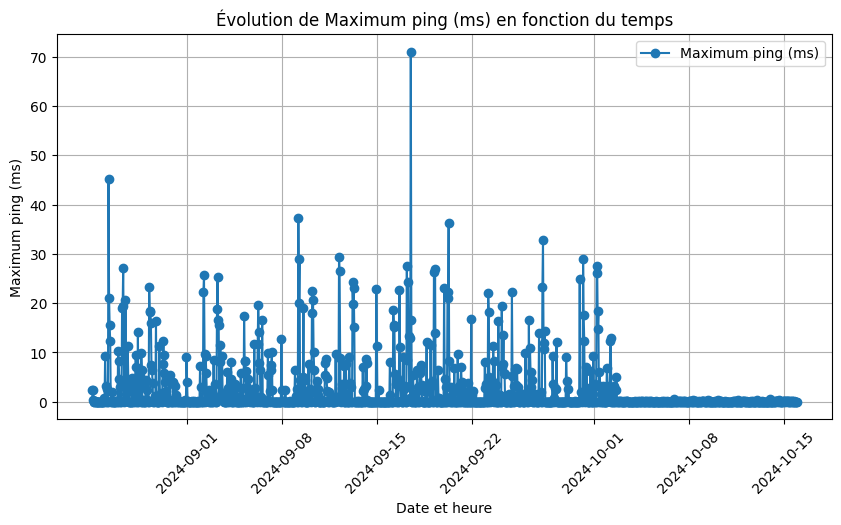

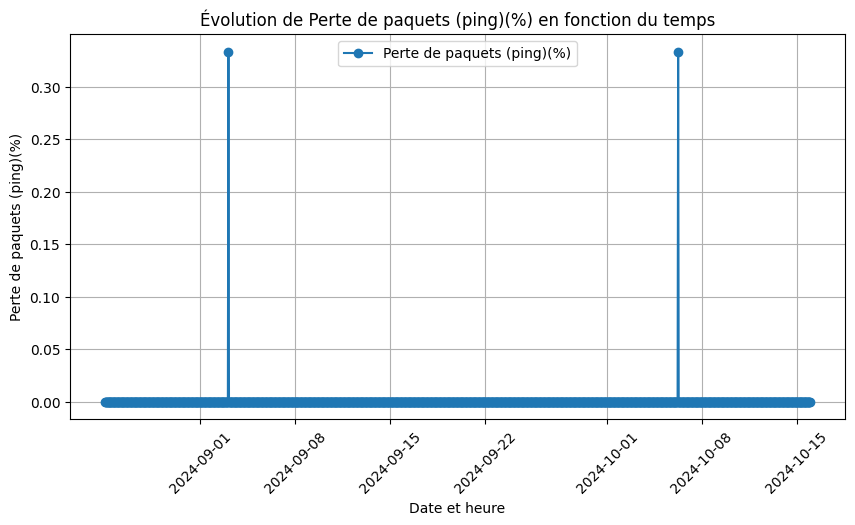

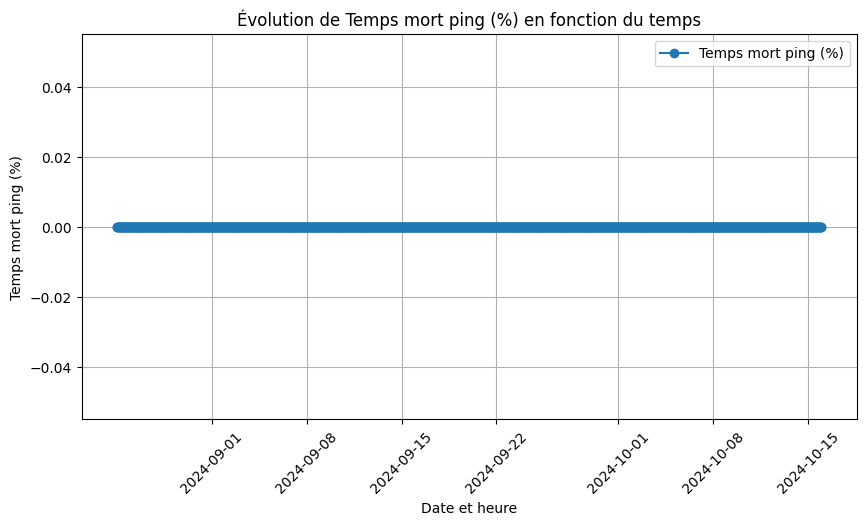

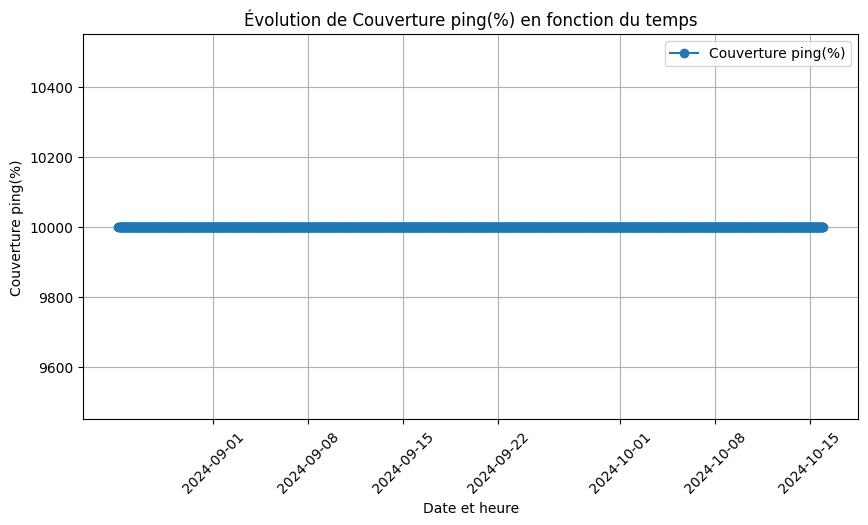

In [13]:
# Vérifier que 'Date et heure' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["Date et heure"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

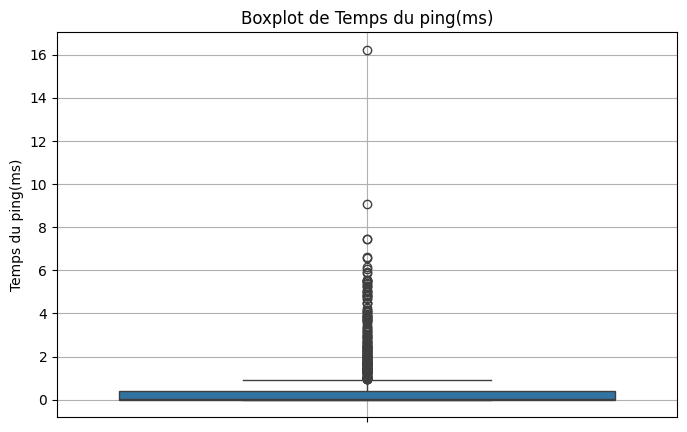

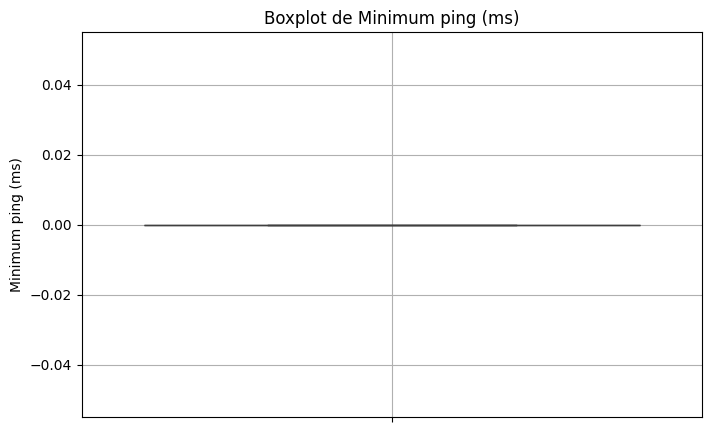

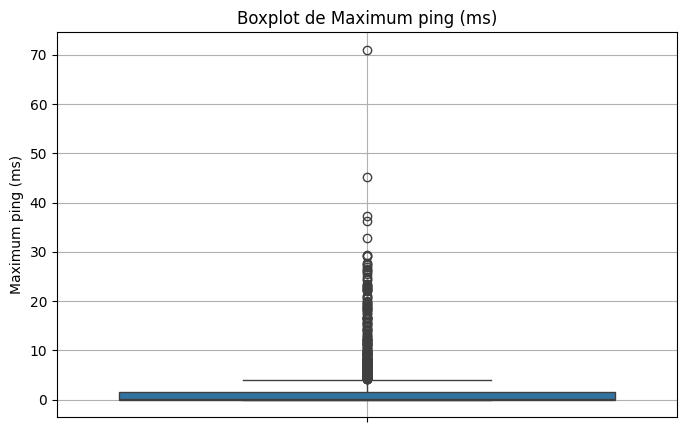

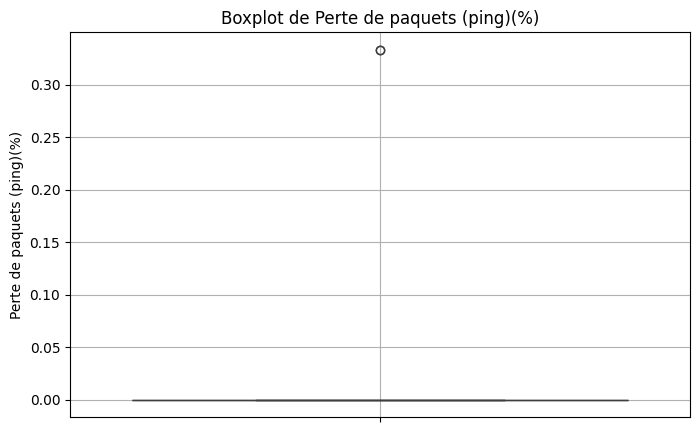

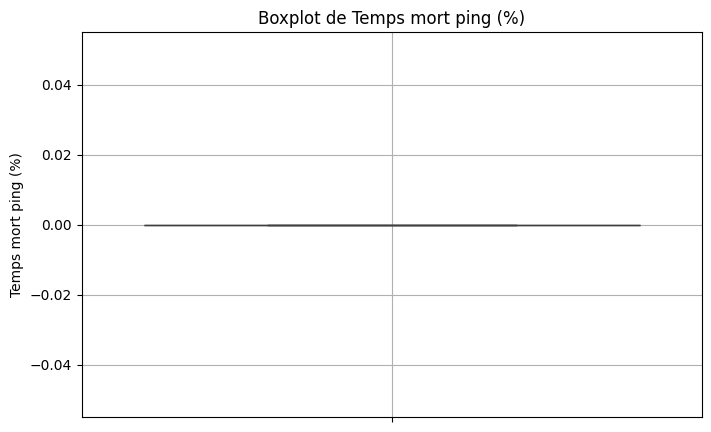

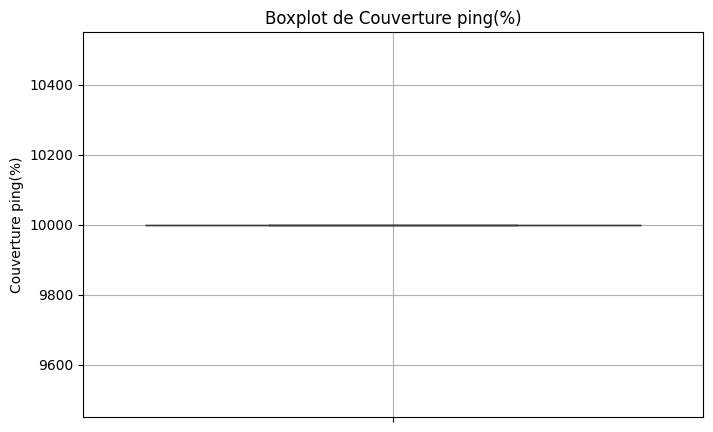

In [14]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

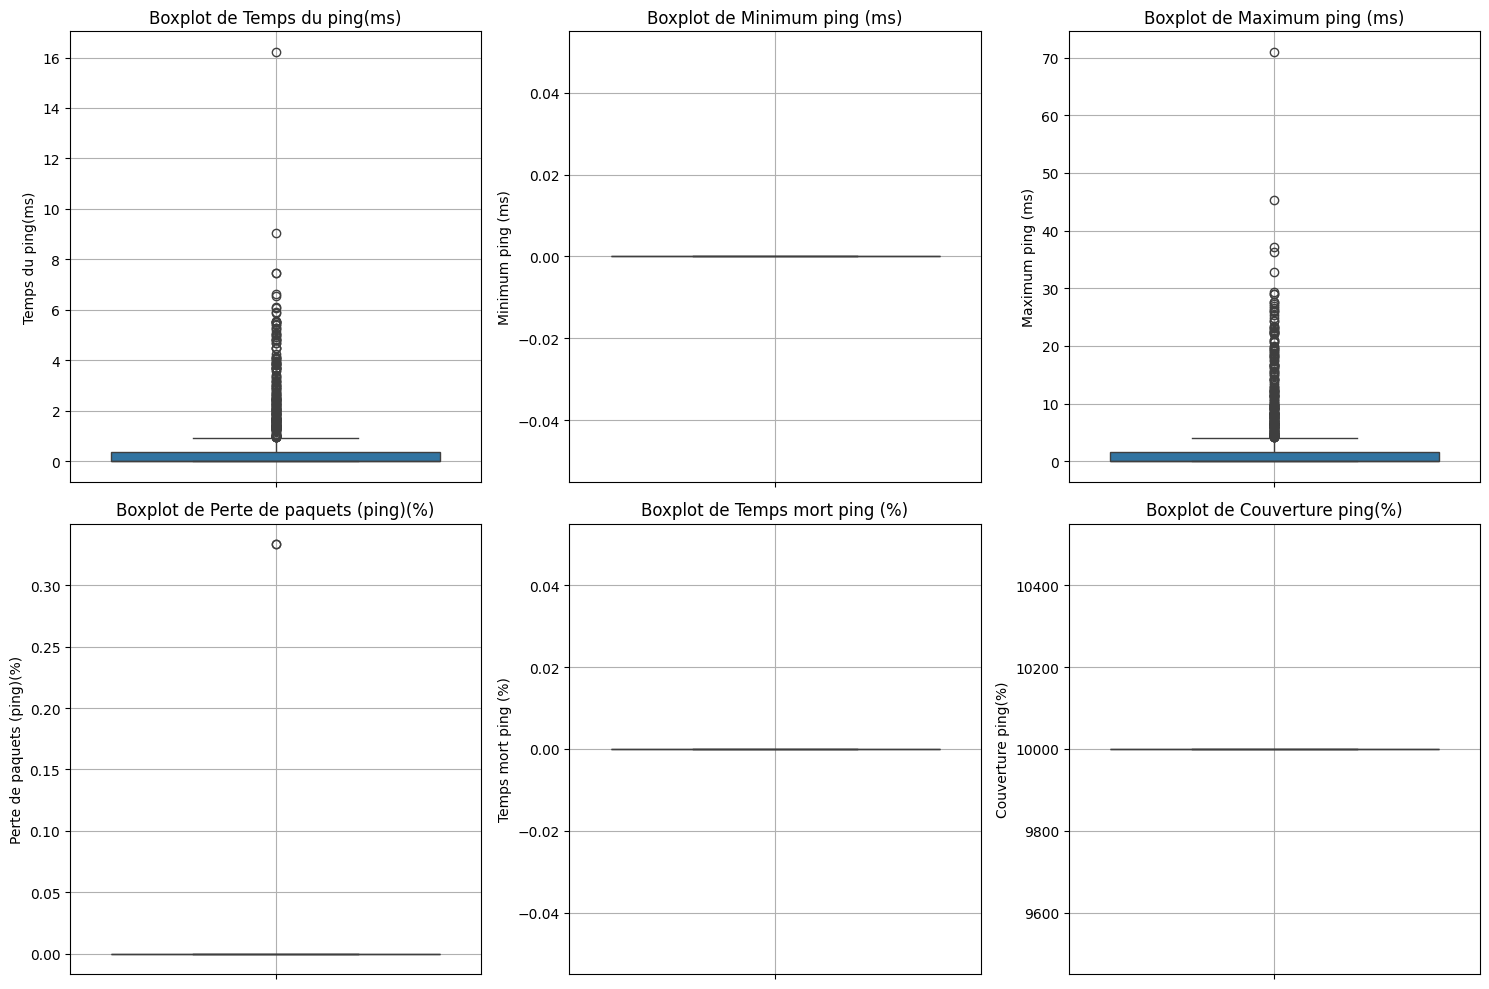

In [15]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [16]:
tab = tab.drop(columns=["Couverture ping(%)"])
tab = tab.drop(columns=["Temps mort ping (%)"])
tab = tab.drop(columns=["Minimum ping (ms)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [17]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_ping_filtered.csv", index=False, encoding='utf-8')